# Example: Regression with XGBoost

Superconductivty Data Set: Predict the critical temperature based on 81 material features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
filename = "train_critical_temp.csv"
#filename = "https://www.physi.uni-heidelberg.de/~marks/ml_einfuehrung/Beispiele/train_critical_temp.csv"
df = pd.read_csv(filename, engine='python')

In [3]:
df.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  wtd_gmean_Valence  \
0        51.968828  ...          2.257143       2.213364           2.219783   
1        47.094633  ...          2.257143       1.888175           2.210679   
2        51.968828  ...          2.271429       2.213364           2.232679   
3        51.968828  ...          2.264286       2.213364           2.226222   
4        51.968828  ...          2.242857       2.213364           2.206963   

   entropy_Valence  wtd_entropy_Valence  range_Valence  wtd_range_Valence  \
0         1.368922             1.066221              1           1.085714   
1         1.557113             1.047221              2           1.128571   
2         1.368922             1.029175              1           1.114286   
3         1.368922             1.048834              1           1.100000   
4         1.368922             1.096052              1           1.057143   

   std_Valence  wtd_std_Valence  critical_temp  
0     0.433013         0.437059           29.0  
1     0.632456         0.468606           26.0  
2     0.433013         0.444697           19.0  
3     0.433013         0.440952           22.0  
4     0.433013         0.428809           23.0  

[5 rows x 82 columns]

In [4]:
y = df['critical_temp'].values
X = df[[col for col in df.columns if col!="critical_temp"]]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [6]:
import xgboost as xgb
import time
# XGBreg = xgb.sklearn.XGBRegressor(nthread=-1, seed=1, n_estimators=1000)
XGBreg = xgb.sklearn.XGBRegressor()

start_time = time.time()
XGBreg.fit(X_train, y_train)
run_time = time.time() - start_time

print(run_time)

0.5190329551696777


In [7]:
y_pred = XGBreg.predict(X_test)

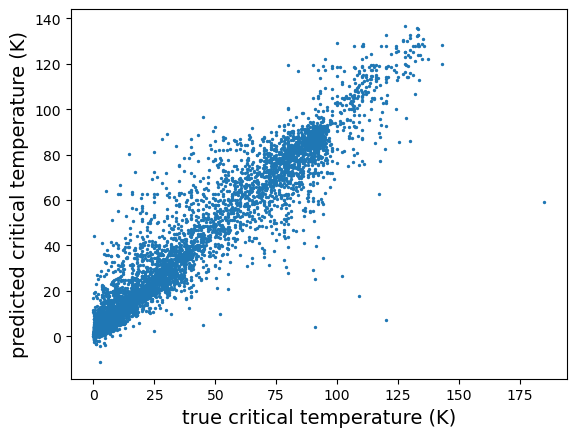

In [8]:
plt.scatter(y_test, y_pred, s=2)
plt.xlabel("true critical temperature (K)", fontsize=14)
plt.ylabel("predicted critical temperature (K)", fontsize=14)
plt.savefig("critical_temperature.pdf")

In [9]:
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"root mean square error {rms:.2f}")

root mean square error 9.97


In [10]:
# compare with other regressors

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

from sklearn.neural_network import MLPRegressor
mlpr = MLPRegressor(hidden_layer_sizes=(50,50), activation='relu', random_state=1, max_iter=5000)

In [11]:
regressors = [rfr, gbr, mlpr]

for reg in regressors:
    
    start_time = time.time()
    reg.fit(X_train, y_train)
    run_time = time.time() - start_time
    
    y_pred = reg.predict(X_test)
    rms = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(run_time)
    print(f"root mean square error {rms:.2f}\n")


59.528165340423584
root mean square error 9.86

20.12436056137085
root mean square error 12.88

3.5015909671783447
root mean square error 22.26

